In [3]:
import scipy.io as Sio
from scipy import signal as sig
from scipy import signal
from enum import Enum
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import os, sys


In [4]:
def read_dir():
    paths=sorted([x for x in os.listdir('1st and 2nd subject/') if x[-4:]=='.mat'])
    return paths
path = read_dir()
path

['U001ai.mat',
 'U001aii.mat',
 'U001bi.mat',
 'U001bii.mat',
 'U001ci.mat',
 'U001cii.mat',
 'U001di.mat',
 'U001dii.mat',
 'U001ei.mat',
 'U001eii.mat']

In [5]:
def load_files(files):
    matfiles_i = []
    matfiles_ii = []
    matfiles_i = [Sio.loadmat('1st and 2nd subject/'+files[i]) for i in range(0,len(files),2)]
    matfiles_ii = [Sio.loadmat('1st and 2nd subject/'+files[i]) for i in range(1,len(files),2)]
    
    return matfiles_i,matfiles_ii #,columns_indexs

matfiles_i,matfiles_ii = load_files(path)
print(matfiles_i,'\n**************************\n',matfiles_ii)
# matfiles_eegs = [matfile['eeg'] for matfile in matfiles]
# columns_indexs = []
# for matfile in matfiles:
#         recorded_count =  [tuple((event[1],event[2])) for event in matfile['events']]
#         recoded_columns_indexs = [ tup for tup in recorded_count if tup[0]== 32779 or tup[0]== 32780 ]
#         columns_indexs.append([tuple((recoded_columns_indexs[i][1],recoded_columns_indexs[i+1][1])) for i  
#                       in range(0,len(recoded_columns_indexs)-1,2)]) 

# # print(matfiles_eegs, '  ', len(matfiles_eegs))
# len(columns_indexs)

[{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon May 16 13:02:00 2016', '__version__': '1.0', '__globals__': [], 'info': array([[(array([[0]], dtype=uint8), array(['X X 13-May-1951 Anonymous                                                       '],
      dtype='<U80'), array(['Startdate 16-May-2016                                                           '],
      dtype='<U80'), array(['16.05.16'], dtype='<U8'), array(['12.42.30'], dtype='<U8'), array([[4096]], dtype=uint16), array([[139]], dtype=uint8), array([[1]], dtype=uint8), array([[15]], dtype=uint8), array([[array(['AF3'], dtype='<U3'), array(['F7'], dtype='<U2'),
        array(['F3'], dtype='<U2'), array(['FC5'], dtype='<U3'),
        array(['T7'], dtype='<U2'), array(['P7'], dtype='<U2'),
        array(['O1'], dtype='<U2'), array(['O2'], dtype='<U2'),
        array(['P8'], dtype='<U2'), array(['T8'], dtype='<U2'),
        array(['FC6'], dtype='<U3'), array(['F4'], dtype='<U2'),
        array(['F8'], d

In [45]:
seq_i = [4 ,2 ,3 ,5 ,1 ,2, 5 ,4 ,2 ,3 ,1 ,5]
seq_ii = [4 ,3 ,2 ,4 ,1 ,2 ,5 ,3 ,4 ,1 ,3 ,1 ,3]
freq_indications = [12.00,10.00,8.57,7.50,6.66]

In [6]:
def dis_files(i_files,ii_files):
    eeg_i = [ i_file['eeg'] for i_file in i_files]
    eeg_ii = [ ii_file['eeg'] for ii_file in ii_files]
    return eeg_i,eeg_ii 
eegs_i,eegs_ii = dis_files(matfiles_i,matfiles_ii)
print(eegs_i,'\n******************************\n',eegs_ii)

[array([[4194.86747616, 4202.05145052, 4188.71337224, ..., 3931.79      ,
        3931.79      , 3931.79      ],
       [4157.95175738, 4166.66765881, 4162.56605814, ..., 3967.18      ,
        3967.18      , 3967.18      ],
       [4191.28275853, 4200.512336  , 4185.63604028, ..., 3954.36      ,
        3954.36      , 3954.36      ],
       ...,
       [4185.643131  , 4197.95498573, 4200.51360571, ..., 3959.49      ,
        3959.49      , 3959.49      ],
       [4144.60791165, 4154.35659052, 4143.58532296, ..., 3968.2       ,
        3968.2       , 3968.2       ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]]), array([[4184.10486351, 4187.17846113, 4184.61712978, ..., 3956.92      ,
        3956.92      , 3956.92      ],
       [4203.07782879, 4213.3321297 , 4203.07782879, ..., 3969.23      ,
        3969.23      , 3969.23      ],
       [4171.7919086 , 4180.51218524, 4182.56150362, ..., 3958.46      ,
        3958.46 

In [7]:
# # for 7.5 HZ,  12tr (i) (1-8) 13tr (ii)  (13 - 16 - 21) 
# # final_col_inde7_5 = [ for cols in columns_indexs] 
# def sq_values(columns_indexs):
#     for_i = []
#     for_ii = []
#     for cols in columns_indexs:
#         if len(cols) == 12:
#             for_i.append([cols[0],cols[7]])
#         elif len(cols) == 13:
#             for_ii.append([cols[0],cols[3],cols[8]])
#     return for_i,for_ii        
            
# for_i,for_ii = sq_values(columns_indexs)  
# print(for_i,'***********',for_ii)

In [8]:
# for 7.5 HZ,  12tr (i) (1-8) 13tr (ii)  (13 - 16 - 21) 
# final_col_inde7_5 = [ for cols in columns_inde
for_i_evns = [[(1030, 1670), (10886, 11526)], [(1009, 1649), (10865, 11505)], [(931, 1571), (10787, 11427)], [(1313, 1953), (11169, 11809)], [(985, 1625), (10841, 11481)]] 
for_ii_evns = [[(1059, 1699), (5283, 5923), (12323, 12963)], [(1134, 1774), (5358, 5998), (12398, 13038)], [(3261, 3901), (7485, 8125), (14525, 15165)], [(1025, 1665), (5249, 5889), (12289, 12929)], [(992, 1632), (5216, 5856), (12256, 12896)]]

[[(1030, 1670), (10886, 11526)], [(1009, 1649), (10865, 11505)], [(931, 1571), (10787, 11427)], [(1313, 1953), (11169, 11809)], [(985, 1625), (10841, 11481)]] *********** [[(1059, 1699), (5283, 5923), (12323, 12963)], [(1134, 1774), (5358, 5998), (12398, 13038)], [(3261, 3901), (7485, 8125), (14525, 15165)], [(1025, 1665), (5249, 5889), (12289, 12929)], [(992, 1632), (5216, 5856), (12256, 12896)]]

In [9]:
# _7_5data_i = [ eeg_i[] for eeg_i in eegs_i]
channels_def = ["AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC8","F4","F8","AF4","index"]    
eegs_iDF = [pd.DataFrame(data=eeg_i,index=channels_def) for eeg_i in eegs_i]
eegs_iiDF = [ pd.DataFrame(data=eeg_ii,index=channels_def) for eeg_ii in eegs_ii]
print(eegs_iDF,'\n***********************\n',eegs_iiDF)

[             0            1            2            3            4      \
AF3    4194.867476  4202.051451  4188.713372  4193.845979  4207.686433   
F7     4157.951757  4166.667659  4162.566058  4155.893069  4163.591458   
F3     4191.282759  4200.512336  4185.636040  4186.156133  4201.024173   
FC5    4076.927706  4088.720524  4087.176829  4102.563167  4106.156687   
T7     4128.207209  4113.849576  4128.719382  4135.898199  4128.207209   
P7     4211.278534  4224.613500  4201.021535  4210.255435  4223.590401   
O1     4196.409071  4190.259474  4170.254037  4168.714499  4170.767216   
O2     4207.695700  4226.152031  4203.591437  4176.412477  4171.280006   
P8     4183.590871  4207.688259  4191.278777  4178.971666  4186.667648   
T8     4191.796289  4208.206309  4190.772290  4179.490944  4181.538943   
FC8    4178.458816  4172.820074  4176.926295  4183.594517  4187.689039   
F4     4203.588100  4204.097849  4198.967997  4202.050763  4211.792626   
F8     4185.643131  4197.954986  4200

In [10]:
# _7_5HZ_eeg_i = 
def slices_7_5Hzi_ii(i_dfs,ii_dfs):
    eeg_i_ev_slice = []
    eeg_i_ev_slice = [i_dfs[i].iloc[:,event[0]:event[1]] for i,for_i_evn in enumerate(for_i_evns,0) for event in for_i_evn ]
    eeg_ii_ev_slice = [ii_dfs[i].iloc[:,event[0]:event[1]] for i,for_ii_evn in enumerate(for_ii_evns,0) for event in for_ii_evn ]    
    return eeg_i_ev_slice,eeg_ii_ev_slice
eeg_i_ev_slice,eeg_ii_ev_slice = slices_7_5Hzi_ii(eegs_iDF,eegs_iiDF)
print(eeg_i_ev_slice,'\n************************************\n',eeg_ii_ev_slice)

[              1030         1031         1032         1033         1034  \
AF3    4179.997152  4183.589139  4198.459463  4191.275489  4178.967281   
F7     4169.743859  4178.972461  4202.051852  4190.251863  4176.408960   
F3     4168.200559  4172.815348  4191.794596  4184.100529  4171.791674   
FC5    4178.971858  4174.872209  4189.743982  4187.179593  4172.822384   
T7     4193.328732  4181.540359  4180.516014  4178.971099  4176.410234   
P7     4152.814506  4177.949790  4211.790083  4201.533084  4183.585503   
O1     4192.816817  4201.027684  4192.303637  4200.001326  4215.388149   
O2     4174.870165  4178.460324  4189.744905  4180.002636  4184.106899   
P8     4166.664555  4167.181389  4188.202000  4179.488500  4174.360537   
T8     4156.919575  4173.850271  4186.155616  4172.305595  4185.131617   
FC8    4168.713854  4167.181333  4185.127038  4188.718518  4180.517776   
F4     4184.096281  4190.253722  4203.070260  4191.791059  4186.661207   
F8     4148.210280  4151.795556  4170

 [              1059         1060         1061         1062         1063  \
AF3    4188.718187  4188.718187  4184.617339  4188.202461  4193.334760   
F7     4198.462635  4198.462635  4195.384623  4202.049479  4205.644664   
F3     4190.766633  4190.766633  4186.664874  4187.692548  4193.331349   
FC5    4190.251894  4190.251894  4188.202062  4193.845755  4199.995251   
T7     4171.797195  4171.797195  4173.333046  4173.844997  4172.821096   
P7     4187.693063  4187.693063  4185.132968  4183.077680  4180.517585   
O1     4177.948309  4177.948309  4195.386002  4187.178924  4168.717693   
O2     4172.306436  4172.306436  4182.050046  4176.408556  4175.901166   
P8     4174.356715  4174.356715  4168.722657  4168.722657  4175.896691   
T8     4177.947394  4177.947394  4179.489184  4189.746621  4171.281420   
FC8    4179.486154  4179.486154  4171.790475  4185.642697  4187.691995   
F4     4174.360563  4174.360563  4168.720455  4172.308847  4172.823887   
F8     4163.079637  4163.079637  416

In [11]:
conc_eeg_i = [ pd.concat([eeg_i_ev_slice[i],eeg_i_ev_slice[i+1]],axis=1) for i in range(0,10,2)]
conc_eeg_ii = [ pd.concat([eeg_ii_ev_slice[i],eeg_ii_ev_slice[i+1],eeg_ii_ev_slice[i+2]],axis=1) for i in range(0,15,3)]
# conc_eeg_i[1]
# conc_eeg_i =  pd.concat([eeg_i_ev_slice[0],eeg_i_ev_slice[1]],axis=1)
# conc_eeg_i
conc_eeg_i_ii = [ pd.concat([conc_eeg_i[i],conc_eeg_ii[i]],axis=1) for i in range(0,5)] 

In [12]:
# len(conc_eeg_i_ii)
# conc_eeg_i_ii[0]
final_concat_i_ii_7_5HZ = pd.concat(conc_eeg_i_ii,axis=1)
final_concat_i_ii_7_5HZ = final_concat_i_ii_7_5HZ.drop(["index"])
final_concat_i_ii_7_5HZ

,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,...,12886,12887,12888,12889,12890,12891,12892,12893,12894,12895
AF3,4179.997152,4183.589139,4198.459463,4191.275489,4178.967281,4186.662004,4190.253991,4181.018649,4182.559268,4191.275489,...,4179.483147,4179.997260,4185.124110,4188.203076,4183.587483,4182.562113,4185.638223,4179.997260,4173.842184,4177.946520
F7,4169.743859,4178.972461,4202.051852,4190.251863,4176.408960,4187.688362,4189.739163,4183.586762,4186.662962,4189.226463,...,4167.694762,4175.898300,4182.564899,4177.438503,4171.284218,4172.821157,4174.361360,4171.796531,4170.259591,4171.796531
F3,4168.200559,4172.815348,4191.794596,4184.100529,4171.791674,4184.612366,4185.636040,4170.768000,4174.870952,4187.179807,...,4185.642143,4187.180000,4191.283440,4191.796059,4187.180000,4185.642143,4186.667381,4184.101798,4182.563941,4180.000847
FC5,4178.971858,4174.872209,4189.743982,4187.179593,4172.822384,4181.536248,4189.743982,4182.565378,4185.644333,4193.337502,...,4174.359236,4175.385986,4182.564644,4184.618144,4174.874759,4170.772055,4174.359236,4174.874759,4172.310032,4171.283282
T7,4193.328732,4181.540359,4180.516014,4178.971099,4176.410234,4183.589051,4186.662088,4184.613397,4186.662088,4185.125570,...,4174.362395,4172.818912,4180.511161,4187.691713,4185.644920,4180.511161,4182.054644,4185.124833,4181.022859,4177.952670
P7,4152.814506,4177.949790,4211.790083,4201.533084,4183.585503,4190.252986,4184.097053,4171.793856,4187.686569,4209.743886,...,4181.026708,4177.950460,4186.153788,4186.153788,4181.539416,4183.077540,4185.128372,4185.128372,4185.128372,4184.102956
O1,4192.816817,4201.027684,4192.303637,4200.001326,4215.388149,4203.593580,4182.561785,4194.356354,4220.511388,4218.971851,...,4185.640196,4182.563944,4187.180266,4186.666909,4183.077301,4187.180266,4189.743161,4186.666909,4183.590657,4184.613482
O2,4174.870165,4178.460324,4189.744905,4180.002636,4184.106899,4207.695700,4204.619645,4186.154746,4186.668850,4196.411119,...,4183.592517,4185.130242,4190.769758,4193.848784,4191.284717,4189.232033,4188.720650,4184.615283,4175.900316,4170.768607
P8,4166.664555,4167.181389,4188.202000,4179.488500,4174.360537,4200.509111,4202.560296,4181.022851,4185.125222,4194.355555,...,4179.998726,4185.639750,4190.256134,4188.716421,4189.741060,4185.127430,4171.793350,4166.664646,4169.228998,4169.228998
T8,4156.919575,4173.850271,4186.155616,4172.305595,4185.131617,4199.996960,4184.610940,4172.817594,4190.772290,4205.637633,...,4190.256783,4178.462750,4181.029105,4197.949261,4195.900130,4189.232218,4187.693722,4169.231777,4156.923813,4167.693281


In [38]:
# O1
final_concat_i_ii_7_5HZ_conv_O1 = final_concat_i_ii_7_5HZ.to_numpy()[6][:6000]
final_concat_i_ii_7_5HZ_conv_O1

array([4192.81681666, 4201.02768414, 4192.30363745, ..., 4180.00325475,
       4190.25344625, 4185.13524834])

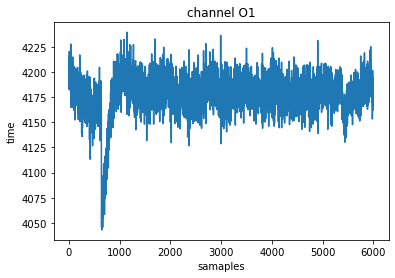

In [39]:
plt.plot(final_concat_i_ii_7_5HZ_conv_O1)
plt.ylabel('time')
plt.xlabel('samaples')
plt.title('channel O1')
plt.show()

In [15]:
# # import scipy.fft
# from scipy.fft import fft, fftfreq, fftshift
# sp = fftshift(fft(final_concat_i_ii_7_5HZ_conv_O1))
# freq = fftshift(fftfreq(final_concat_i_ii_7_5HZ_conv_O1.shape[-1]))
# plt.plot(freq, sp.real, freq, sp.imag)
# plt.show()
# # channel7_FFT_all

In [16]:
# plt.plot(channel7_FFT_all)
# plt.xlabel('freq')
# # plt.ylabel('power')
# # plt.title('channel 7')
# plt.show()

Welch

In [40]:
from scipy.fft import fft
from scipy.signal import butter, filtfilt
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [41]:
len(final_concat_i_ii_7_5HZ_conv_O1)

6000

In [42]:
# avg_ch7 = sum(final_concat_i_ii_7_5HZ_conv_O1)/len(final_concat_i_ii_7_5HZ_conv_O1)
# print(avg_ch7)
# final_concat_i_ii_7_5HZ_conv_O1_mins_avg = final_concat_i_ii_7_5HZ_conv_O1 - avg_ch7 
# print(final_concat_i_ii_7_5HZ_conv_O1_mins_avg)
# channel7_welch_all = signal.welch(final_concat_i_ii_7_5HZ_conv_O1_mins_avg,fs=128,nfft=16000)
final_concat_i_ii_7_5HZ_conv_O1_hp = butter_highpass_filter(final_concat_i_ii_7_5HZ_conv_O1,4,128)
channel7_welch_all = signal.welch(final_concat_i_ii_7_5HZ_conv_O1_hp,fs=128,nfft=6000)
channel7_welch_all 

(array([0.00000000e+00, 2.13333333e-02, 4.26666667e-02, ...,
        6.39573333e+01, 6.39786667e+01, 6.40000000e+01]),
 array([0.03417984, 0.06819329, 0.06769634, ..., 0.02733469, 0.02734332,
        0.0136731 ]))

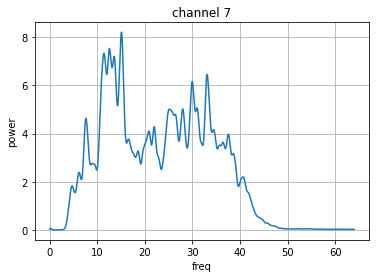

In [43]:
# befor get avg
# plt.semilogy(channel7_welch_all[0], channel7_welch_all[1])
# plt.ylim([0.5e-3, 1])
plt.plot(channel7_welch_all[0],channel7_welch_all[1])
plt.xlabel('freq')
plt.ylabel('power')
plt.title('channel 7')
plt.grid()
plt.show()


In [ ]:
final_concat_i_ii_7_5HZ_conv = final_concat_i_ii_7_5HZ.to_numpy()[7]
final_concat_i_ii_7_5HZ_conv